# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
cities

['pisco',
 'jamestown',
 'maceio',
 'mar del plata',
 'manacapuru',
 'nuuk',
 'havoysund',
 'aklavik',
 'padang',
 'hamilton',
 'port alfred',
 'rincon',
 'castro',
 'puerto ayora',
 'esperance',
 'nizhneyansk',
 'saskylakh',
 'vaitupu',
 'hobart',
 'mogadishu',
 'babanusah',
 'portland',
 'mataura',
 'albany',
 'moindou',
 'najran',
 'hilo',
 'necochea',
 'yellowknife',
 'lazaro cardenas',
 'illoqqortoormiut',
 'barrow',
 'semenivka',
 'tuktoyaktuk',
 'saint-philippe',
 'port elizabeth',
 'skalistyy',
 'saldanha',
 'kabo',
 'cedro',
 'bima',
 'ushuaia',
 'hami',
 'chokurdakh',
 'punta arenas',
 'east london',
 'busselton',
 'tarudant',
 'bambous virieux',
 'porto novo',
 'taolanaro',
 'date',
 'kaitangata',
 'laguna',
 'saint george',
 'bluff',
 'geraldton',
 'provideniya',
 'olafsvik',
 'sterling',
 'mehamn',
 'yaan',
 'pandan',
 'belushya guba',
 'mazamari',
 'paka',
 'kahului',
 'pangnirtung',
 'victoria',
 'hithadhoo',
 'chagda',
 'yulara',
 'maryville',
 'vestmannaeyjar',
 'itoma

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#test API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
query = base_url + cities[1] + "&appid=" + weather_api_key + "&units=imperial"
response = requests.get(query)
data = response.json()

print(response)
pprint(data)

<Response [200]>
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.21, 'lon': 138.6},
 'dt': 1569448397,
 'id': 2069194,
 'main': {'grnd_level': 987.59,
          'humidity': 65,
          'pressure': 1025.05,
          'sea_level': 1025.05,
          'temp': 47,
          'temp_max': 47,
          'temp_min': 47},
 'name': 'Jamestown',
 'sys': {'country': 'AU',
         'message': 0.0063,
         'sunrise': 1569443439,
         'sunset': 1569487424},
 'timezone': 34200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 50.076, 'speed': 6.53}}


In [5]:
# set lists for the dataframe
city2 = []
cloud = []
countries = []
dates = []
humid = []
lat = []
lng = []
max_temp = []
wind_speed = []


# set initial count quantities for organization
count_a = 0
set_a = 1

# define temperature units and url
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

# loops for creating dataframe columns
for city in cities:
    try:
        query = base_url + city.replace(" ","+") + "&appid=" + weather_api_key + "&units=imperial"
        response = requests.get(query)
        data = response.json()
        cloud.append(data['clouds']['all'])
        countries.append(data['sys']['country'])
        dates.append(data['dt'])
        humid.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
        if count_a > 48:
            count_a = 1
            set_a += 1
            city2.append(city)
        else:
            count_a += 1
            city2.append(city)
        print(f"Processing Record {count_a} of Set {set_a} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------\nData Retrieval Complete\n------------------------------")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | maceio
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | manacapuru
Processing Record 6 of Set 1 | nuuk
Processing Record 7 of Set 1 | havoysund
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | rincon
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | esperance
City not found. Skipping...
Processing Record 16 of Set 1 | saskylakh
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | mogadishu
City not found. Skipping...
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | mataura
Processing Record 21 of S

Processing Record 37 of Set 4 | dauriya
Processing Record 38 of Set 4 | suriapet
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | gilgit
Processing Record 41 of Set 4 | yeppoon
Processing Record 42 of Set 4 | cape town
Processing Record 43 of Set 4 | the valley
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | alexandria
Processing Record 46 of Set 4 | maragogi
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | high level
Processing Record 49 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | inhambane
Processing Record 2 of Set 5 | alugan
Processing Record 3 of Set 5 | berlevag
Processing Record 4 of Set 5 | bagnols-sur-ceze
Processing Record 5 of Set 5 | shiliguri
Processing Record 6 of Set 5 | kikwit
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 | kitaotao
Processing Record 11 of Set 5 | panama city
Pro

Processing Record 27 of Set 8 | garowe
Processing Record 28 of Set 8 | muroto
Processing Record 29 of Set 8 | paso de carrasco
Processing Record 30 of Set 8 | quatre cocos
Processing Record 31 of Set 8 | bay roberts
Processing Record 32 of Set 8 | port hardy
Processing Record 33 of Set 8 | tiznit
Processing Record 34 of Set 8 | san felipe
Processing Record 35 of Set 8 | talcahuano
City not found. Skipping...
Processing Record 36 of Set 8 | posse
Processing Record 37 of Set 8 | bagdarin
Processing Record 38 of Set 8 | fairbanks
Processing Record 39 of Set 8 | tarko-sale
City not found. Skipping...
Processing Record 40 of Set 8 | catio
Processing Record 41 of Set 8 | shenjiamen
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | jurm
Processing Record 44 of Set 8 | tessalit
Processing Record 45 of Set 8 | preobrazheniye
Processing Record 46 of Set 8 | san patricio
Processing Record 47 of Set 8 | haimen
Processing Record 48 of Set 8 | dali
Processing Record 49 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create a data frame
weather_df = pd.DataFrame({"City":city2,
                            "Cloudiness":cloud,
                            "Country": countries, 
                            "Date": dates,
                            "humidity":humid,
                            "Lat":lat,
                            "Lng":lng,
                            "Max Temp":max_temp,
                            "Wind Speed":wind_speed})

In [7]:
weather_df.count()

City          535
Cloudiness    535
Country       535
Date          535
humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [15]:
# Export the city data into a .csv.
weather_df.to_csv("../output_data/cities.csv")

In [16]:
weather_df.head()

,City,Cloudiness,Country,Date,humidity,Lat,Lng,Max Temp,Wind Speed
0,qaanaaq,76,GL,1569383614,86,77.48,-69.36,19.79,7.20
1,aiquile,100,BO,1569384107,49,-18.20,-65.18,63.71,6.53
2,xining,0,CN,1569383775,52,36.62,101.77,50.03,6.02
3,comiso,33,IT,1569384117,82,36.95,14.61,66.00,2.24
4,katsuura,75,JP,1569383722,61,33.93,134.50,81.00,9.17


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

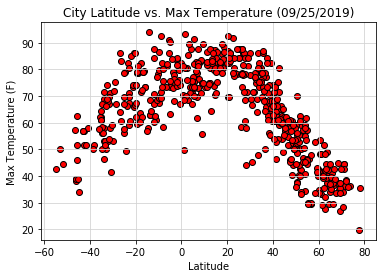

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_MaxTemp(fig1).png")

# Show plot
plt.show()



#### Latitude vs. Humidity Plot

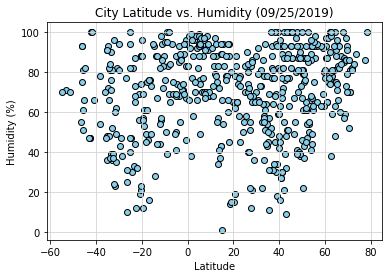

In [24]:
plt.scatter(weather_df["Lat"],weather_df["humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_Humidity(fig2).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

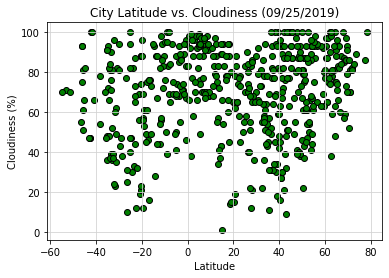

In [22]:
plt.scatter(weather_df["Lat"],weather_df["humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_Cloudiness(fig3).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

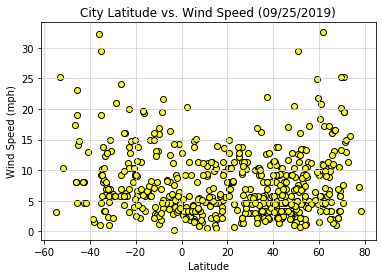

In [25]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Wind Speed (09/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("../Images/Lat_vs_WindSpeed(fig4).png")

# Show plot
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [40]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_df[weather_df['Lat'] >= 0]
south = weather_df[weather_df['Lat'] < 0]

,City,Cloudiness,Country,Date,humidity,Lat,Lng,Max Temp,Wind Speed
1,aiquile,100,BO,1569384107,49,-18.20,-65.18,63.71,6.53
5,mataura,100,NZ,1569383712,93,-46.19,168.86,39.00,8.01
6,bredasdorp,0,ZA,1569383612,66,-34.53,20.04,55.99,13.87
9,cape town,0,ZA,1569383572,81,-33.93,18.42,57.99,3.36
11,marovoay,20,MG,1569384118,73,-16.11,46.64,73.40,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8330863366366839


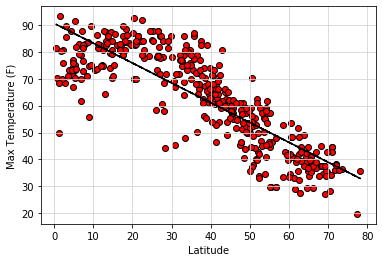

In [49]:
# Defining the variables
lat_n = north["Lat"]
max_temp_n = north["Max Temp"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, max_temp_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, max_temp_n ,edgecolors="black",facecolors="red")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("../Images/Regression_Lat_vs_MaxTemp(fig5).png")

# Show plot
print(f"The r-squared is {r_value}")
plt.show()


The r-squared is: -0.8151657406810827


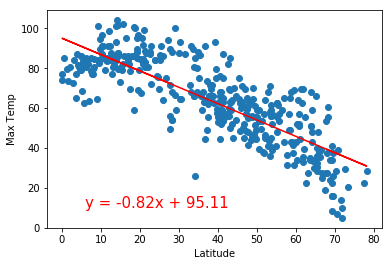

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


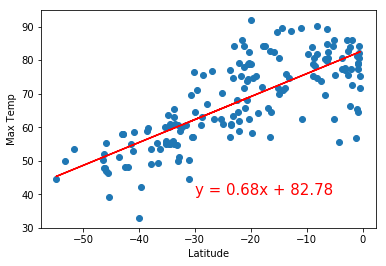

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


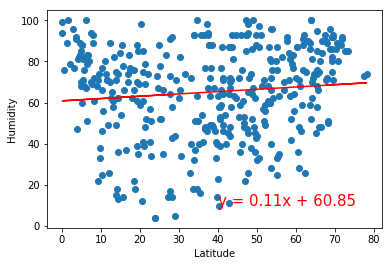

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


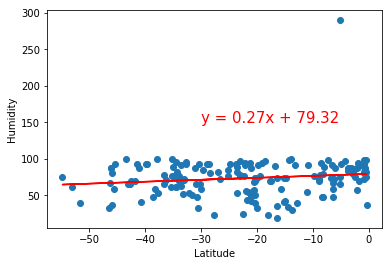

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


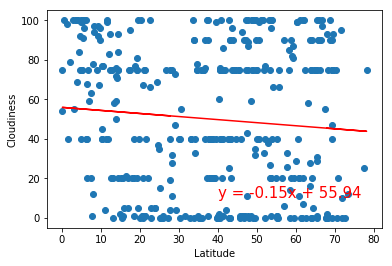

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


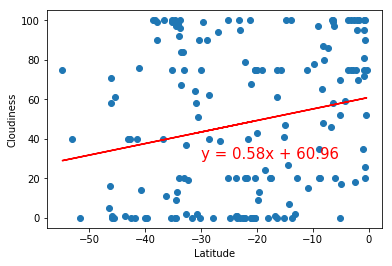

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


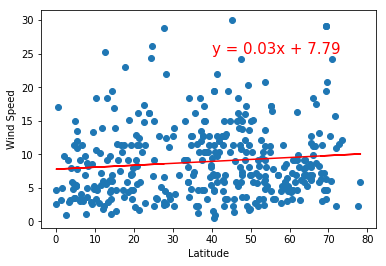

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


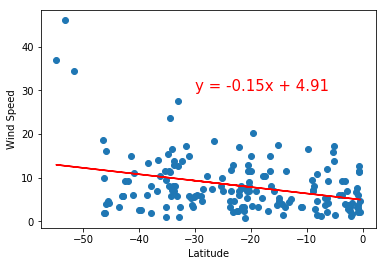